In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [19]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.shape

(5572, 5)

In [21]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [29]:
# Here,the number of null values are high in last 3 cols.so,dropping last 3 cols.

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

df.sample(5)

,v1,v2
4822,ham,:-) :-)
5472,ham,Well obviously not because all the people in m...
2378,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
3975,ham,I wish u were here. I feel so alone
1166,ham,I am not having her number sir


In [30]:
# since the cols name is not descriptive.so,renaming the cols

df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3519,ham,No it will reach by 9 only. She telling she wi...
4612,ham,How much you got for cleaning
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g..."
4603,ham,THANX 4 PUTTIN DA FONE DOWN ON ME!!
610,spam,22 days to kick off! For Euro2004 U will be ke...


In [33]:
# since the target is either ham or spam. so, using Labelencoding method to change it into 0/1.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [35]:
df.sample(5)

,target,text
4440,0,I'm going 2 orchard now laready me reaching so...
316,0,Hmmm... Guess we can go 4 kb n power yoga... H...
901,0,How is it possible to teach you. And where.
28,0,"I'm back &amp; we're packing the car now, I'll..."
1892,1,CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...


In [36]:
# 1. Always check the missing values first.
df.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
# 2.check for duplicate values.if so, then drop it.
df.duplicated().sum()

403

In [41]:
# removing duplicates.
df=df.drop_duplicates(keep='first')

df.duplicated().sum()

0

In [42]:
df.shape

(5169, 2)

## 2. Exploratory Data Analysis (EDA)

In [43]:
# 1. first check, how many percentage of data(sms) are spam and not spam(ham).
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

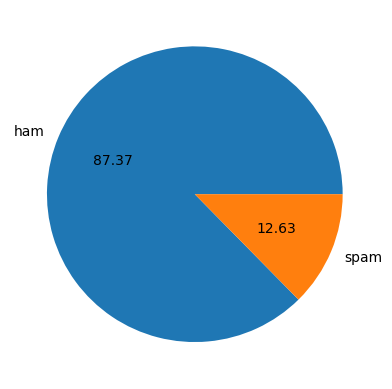

In [46]:
# for better visualization, using pi-chart.
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()
# autopct is used for showing the data size in pichart in percentage and 0.2f means after decimal only 2 digits are shown.

In [48]:
# from above visualization, we can conclude that the dataset is imbalanced.

In [49]:
# 2.The next analysis is about the calculating the count of the number of alphabets used,-
# the number of words used and the number of sentences used in the sms.and ispe analysis karke dekhenge.

In [50]:
# And for deeper analysis, we are going to add 3 cols. 
# 1. Number of characters in the sms.
# 2. Number of words in the sms.
# 3. Number of sentences in the sms.

In [51]:
# for doing above, we need a library called nltk.
import nltk

In [53]:
nltk.download('punkt') # nltk requires some dependencies to run.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [88]:
# to calculate the number of characters.
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [89]:
# to calculate the number of words,it is slightly tricky.so,using nltk.
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [90]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [96]:
# to calculate the number of sentences,it is slightly tricky.so,using nltk.
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# nltk breaks into tokens on the basis of sentences.

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [98]:
# I want to know the full details of these added features.
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [100]:
# Now,we are analyzing ham and spam seperately. i.e for ham msg
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [101]:
# i.e for spam msg
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


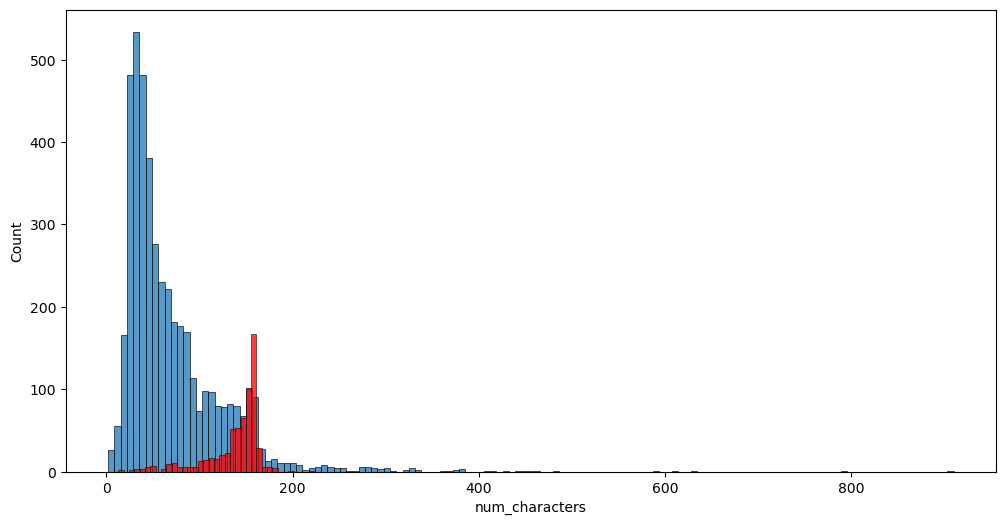

In [110]:
# i.e. for better visualization of these data, we are making plots by using histograms.
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')
plt.show()

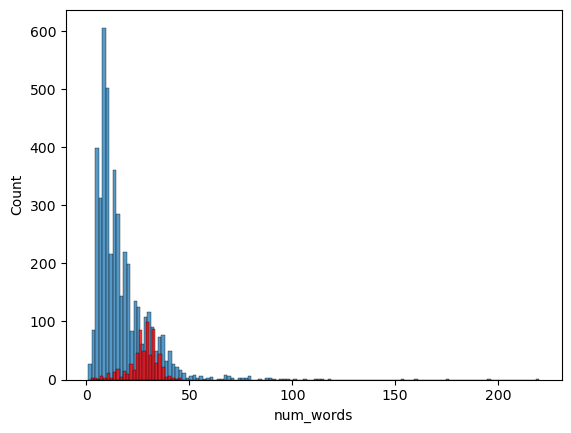

In [112]:
#plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

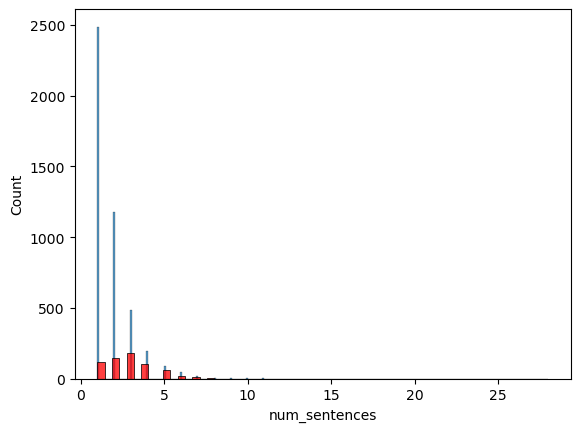

In [113]:
#plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

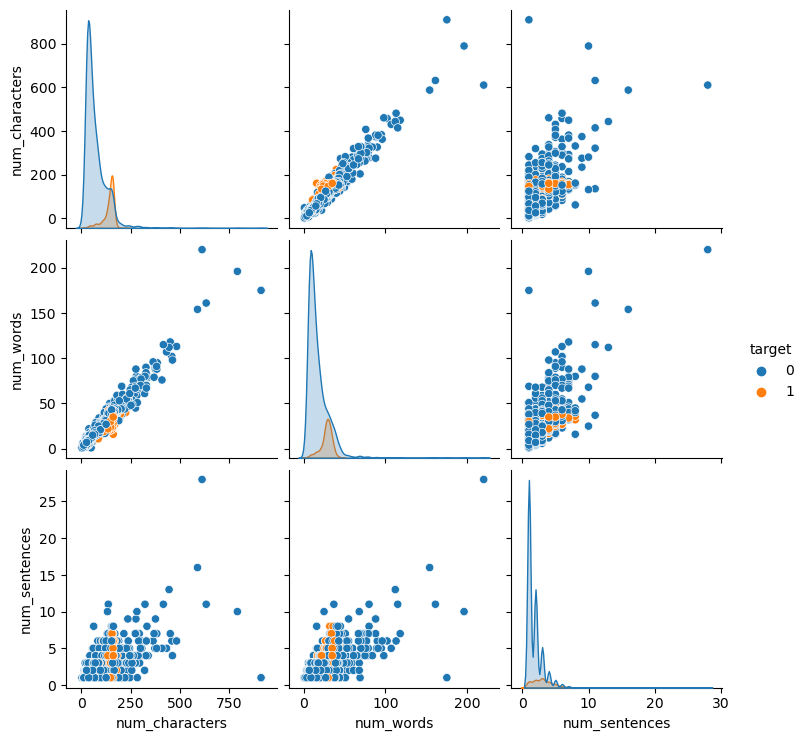

In [115]:
# Here,we are looking that what kind of relationships are there(existing) in between these columns.so,using pairplot
sns.pairplot(df,hue='target')
plt.show()

In [116]:
# we are finding now the prearson correlation coffecient. i.e
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


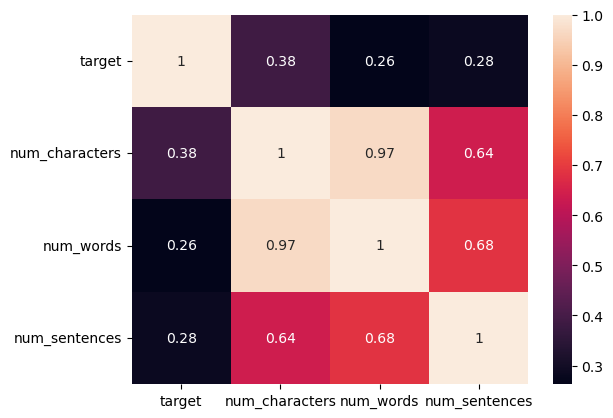

In [120]:
# for visulaizing correlation,using heatmap
sns.heatmap(df.corr(),annot = True)
plt.show()
# by showing,we can say that num_characters is highly correlated with the target as compared to other.
# so,to build a model if we have to select 1 feature then num_chars should be selected.

## 3. Data(Text)  Preprocessing
    . Lower case
    . Tokenization
    . Removing special Characters
    . Removing stopwords and punctuation
    . Stemming

In [143]:
# Here,a single function is being built which can perform all those above mentioned steps.
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #we cannot directly transferred list.so,by clonning it is done.
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [133]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [134]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [142]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [149]:
df['transformed_text'] = df['text'].apply(transform_text)

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [153]:
# Now,we are using wordCloud which show the large sized of frequently occuring words in bothe case of ham and spam.
# first,for spam messages
from wordcloud import WordCloud
wc = WordCloud(width = 1000,height = 1000, min_font_size=10,background_color='white')

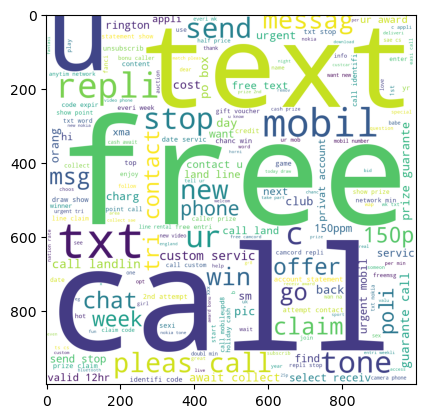

In [154]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

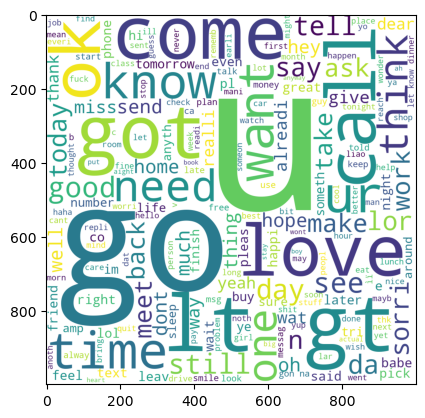

In [158]:
Ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(Ham_wc)

In [160]:
# Now, we are looking at the top 30 words of both ham messages and spam messages.

In [165]:
# for spam messages.
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
        

In [166]:
len(spam_corpus) # this is total size of words of entire spam messages.

9939

In [170]:
# now, we want top 30 most used words.so,importing collections library and using it.

from collections import Counter
# Counter(spam_corpus).most_common(30)

# Counter will form a dict which gives the info of which words is being occured by how many times.
# most_common(30) will give the most 30 common used words from the dictionary.
# this data is then added to a DataFrame.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


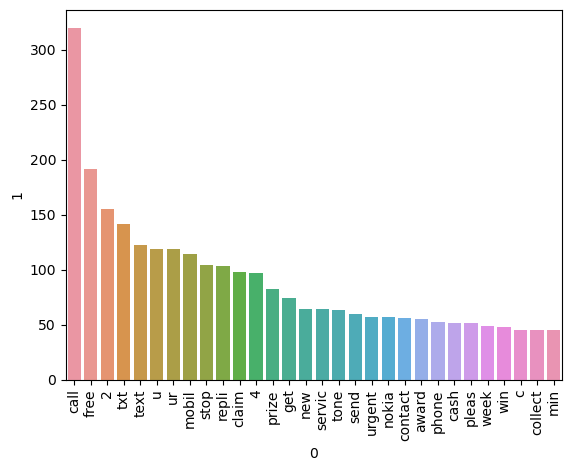

In [176]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [181]:
# for ham messages.
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [182]:
len(ham_corpus)

35394

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


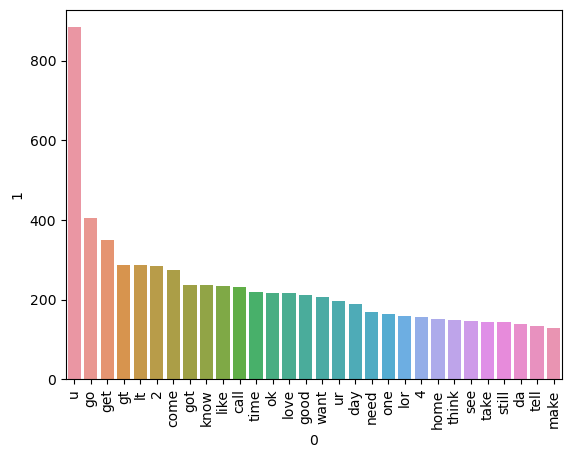

In [184]:
# visualizing above analysis using barplot.
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [310]:
# NB works very well in textual data. so,using it.
# since any ML algo requires numerical data as inputs but our inputs is in textual form.
# so,we need to convert them into a vector by Bow (Bag of Words)

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() # BagOfWords
tfidf = TfidfVectorizer(max_features = 3000)
# Tf-idf gives best results in 3000 max_features.
# we know this by doing experiments on 1000,2000,3000,4000 and so on...
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [311]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [313]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# since, this is a high precision model.so,trying to reduce the false positives

In [314]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [315]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [316]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# still the precision score is less as it is imbalanced dataset.
# i.e precision score matters alot in imbalanced dataset rather than accuracy score.

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [296]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [297]:
# tf-idf and mnb(MultinomialNB) are giving better results than others. so,choosing only this two.

In [298]:
 # Here,we are also trying other algorithms for the prediction.
    
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [299]:
# creating objects of all ML algos.

svc = SVC(kernel = 'sigmoid',gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state =2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state =2)
xgb = XGBClassifier(n_estimators = 50,random_state =2)

In [300]:
# A dict is made where keys= algo_name, and values = their_object
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [301]:
# A common function is made which is used by all algo.
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [302]:
# 1.example of using this function.
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [303]:
# Now,a loop is run over the dict where the precision and accuracy produced by each algo are stored in the list for further use.
# in loop in each iteration, 1 algo is caught,nd then model is trained by using that algo,accuracy and precision thus produced are stored and this process is repeated.

In [304]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [305]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [306]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,XGB,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,Bgc,0.958414,0.862595


In [307]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,XGB,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,Bgc,Accuracy,0.958414


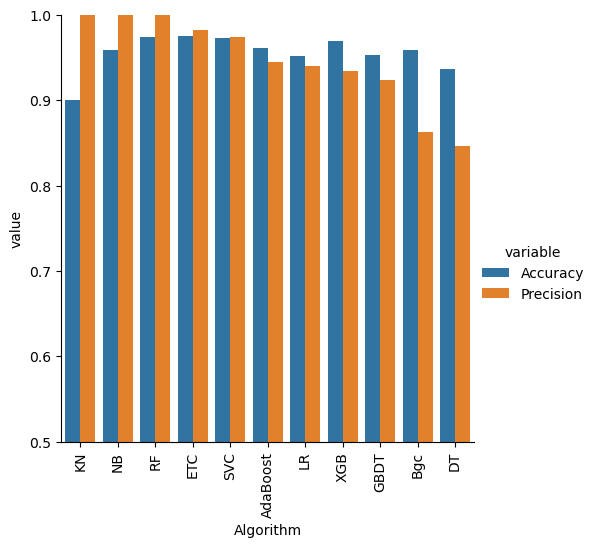

In [308]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [286]:
# Now, we are trying to improve the model by using
# i.e when we are importing tf-idf,there is a hidden feature called max_features which means for how many max words,you want to vectorize
# since, we have not given any value which means all uniques values are taken. i.e around 6000 words are taken.
# so, if max_features=1000 is made then only MOST COMMON 1000 USED words from the corpus are only taken to vectorize.  

In [287]:
# Model improve
# 1.change the max_features parameters of Tf-idf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [317]:
performance_df.merge(temp_df,on ='Algorithm')
# here, the accuracy of NB is changed to 97% on changing the max_features of tf-idf.

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,XGB,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,Bgc,0.958414,0.862595,0.957447,0.867188


In [318]:
# trying more methods to improve the model.
# Voting Classifier
svc  = SVC(kernel ='sigmoid',gamma =1.0,probability=True)
mnb  = MultinomialNB()
etc  = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [319]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting ='soft')

In [320]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [322]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

# This is not satisfactory results than NB.

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [323]:
# Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [324]:
from sklearn.ensemble import StackingClassifier

In [325]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [326]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

# This is also not a satisfactory results than NB.

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [327]:
# when an email comes then we have to perform these 3 steps.
# 1. Text transform / Text Preprocessing
# 2. vectorize
# 3. model Build by applying appropriate ML algorithm

In [331]:
# so, we are going to do 2 files to pickle

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump((mnb.fit(X_train,y_train)),open('model.pkl','wb'))